#드라이브 바운드

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


#DATA 작 해주기 - train/test/validation


```
1. split folder ratio 사용
!pip install split-folders
import splitfolders

#splitfolders.ratio('인풋경로',output='output경로' ,seed=77, ratio= (0.8,0.1,0.1)) 
#처음폴더를 output foloder(없다면 생성해준후 실행)로 train-valid-test 데이터를 0.8,0.1,0.1의 비율로 나눠줘
```

#YOLO를 인식

In [ ]:
%cd /content

/content


In [ ]:
!git clone https://github.com/dhrim/darkeras-yolov4

Cloning into 'darkeras-yolov4'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 175 (delta 27), reused 25 (delta 23), pack-reused 139
Receiving objects: 100% (175/175), 8.08 MiB | 9.43 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [ ]:
%cd darkeras-yolov4

/content/darkeras-yolov4


In [ ]:
!wget -O weights/yolov3.weights https://pjreddie.com/media/files/yolov3.weights

--2022-09-11 04:09:38--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘weights/yolov3.weights’

weights/yolov3.weig 100%[===================>] 236.52M  96.6MB/s    in 2.4s    

2022-09-11 04:09:41 (96.6 MB/s) - ‘weights/yolov3.weights’ saved [248007048/248007048]



##모델 로딩

In [ ]:
import yolov3_wrapper
model = yolov3_wrapper.YoloV3Wrapper("weights/yolov3.weights")

In [ ]:
model.save("yolov3.h5")#

##이미지 로딩 
- 이는 sit, stand를 따로 진행한다.

In [ ]:
#폴더의 모든 사진을 불러옴 - 확인용 코드(안돌려도 됨)
# import glob

# for filename in glob.glob('/gdrive/MyDrive/PROJECT/T_DATA/TRAIN_SIT/*/*.jpg'):
#   #print(filename)
#   name_list = filename.split("/")
#   print(name_list)

#OpenPose

##프로젝트 다운로드

In [ ]:
%cd /content

/content


In [ ]:
!git clone https://github.com/dhrim/Open-Pose-Keras

Cloning into 'Open-Pose-Keras'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 418 (delta 11), reused 21 (delta 11), pack-reused 397
Receiving objects: 100% (418/418), 29.70 MiB | 23.41 MiB/s, done.
Resolving deltas: 100% (236/236), done.


In [ ]:
%cd Open-Pose-Keras

/content/Open-Pose-Keras


##install library & 모델 로딩

In [ ]:
!pip install configobj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=92ef3241873aa351fd2683ac3f1a25437a8b3e48e20b8502e5a2effec4242950
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [ ]:
from open_pose_wrapper import OpenPoseWrapper
model = OpenPoseWrapper()

Downloading...
From: https://drive.google.com/uc?id=1d9HGnnLhq6IhC5ZSVpBf7bSrpjNj5kPB
To: /content/Open-Pose-Keras/open_pose_model.h5
100%|██████████| 210M/210M [00:05<00:00, 36.2MB/s]


##pose detect
- https://cmu-perceptual-computing-lab.github.io/openpose/web/html/doc/md_doc_03_python_api.html

In [ ]:
%cd /content/Open-Pose-Keras

/content/Open-Pose-Keras


#Get angle  vlaue


##Get angle  vlaue_save.csv (09/10)


In [ ]:
#9/9
# /gdrive/MyDrive/PROJECT/DATA0829/tmp_data/stand_0908.csv
# FILE_Name,Neck,Hip,OuPut

%%writefile /gdrive/MyDrive/PROJECT/T_DATA/A_0910_2.csv
FILE_Name,cl1,Spin,OuPut,Error_N

Overwriting /gdrive/MyDrive/PROJECT/T_DATA/A_0910_1.csv


In [ ]:
import pandas as pd
import numpy as np
import os
cv_ad='/gdrive/MyDrive/PROJECT/T_DATA/A_0910_2.csv'
tmp_dict=pd.read_csv (cv_ad, encoding="euc-kr") 
tmp_dict

,FILE_Name,cl1,Spin,OuPut,Error_N


추출된 점이 담긴 all_peaks는 18개의 요소가 있는 리스트이다.
- part_str[#] :신체부위 text
- all_peaks[1#][2#][3#] :
    - [1#] : the people tuple data to list // 즉 한 신체부위의 값이다. 다수의 사람에 대해
```
(484, 130, 0.7376982569694519, 1)
  x    y   score               point_id
```
    - [2#] : one person data
    - [3#] : 한 사람의 데이터에서 특정 데이터 추출
- 18 parts
```
part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, Lank, Leye, Reye, Lear, Rear, pt19]
```

##angle 조정을 위해 체크(확인용)
- 09/09 우선 저장 안되는것도 다 저장가능하도록 조정
- 09/10 오리지널 각도 조정으로 돌아가기 - if문만 조정함

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Lhip :  [(175, 669, 0.17784276697784662, 10), (145, 688, 0.18115443969145417, 11), (144, 689, 0.18127286760136485, 12)]
Lkne :  []
Lank :  []
Leye :  [(172, 126, 0.8829075545072556, 13)]
Reye :  []
Lear :  [(96, 134, 0.8648046851158142, 14)]
Rear :  []
SIT process
IMG_1091.jpg angle: neck_angle = 86.39872188277657, spine_angle = 6.732921326859603 GOOD 

0 데이터 저장 출력 sit 

tmp_dict:        FILE_Name                cl1               Spin OuPut  Error_N
0  IMG_1091.jpg  86.39872188277657  6.732921326859603  GOOD        0
pos SIT st GOOD fn IMG_1094.jpg 

all_peaks / [[(195, 155, 0.8414934873580933, 0)], [(105, 283, 0.4684334620833397, 1)], [(88, 277, 0.6452028155326843, 2), (0, 287, 0.11164299172924075, 3)], [(109, 504, 0.6381422728300095, 4)], [(278, 623, 0.8071244210004807, 5)], [(126, 282, 0.37407462298870087, 6), (127, 283, 0.37409233674407005, 7)], [], [], [(171, 684, 0.3694271594285965, 8)], [(341, 669, 0.1345269635785371, 9), (462, 718, 0.72223623

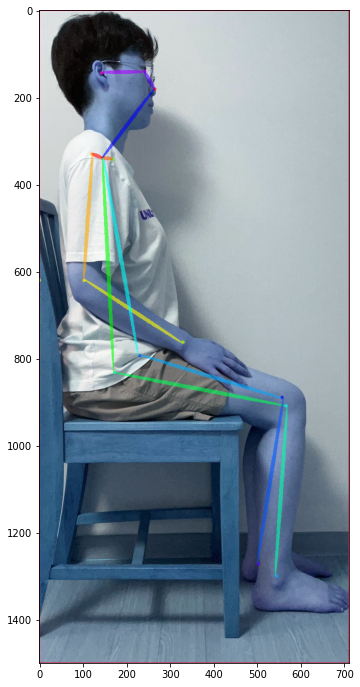

In [ ]:
import glob
import config_reader
import math
from IPython.display import Image, display
from google.colab import output

#directory address
dad='/gdrive/MyDrive/PROJECT/T_DATA/TRAIN_SIT/*/*.jpg'
excp_list=[]#예외처리된 파일 이름 저장

for file_name in glob.glob(dad): #원하는 디렉토리 경로로 변경
  all_peaks,subset,candidate = model.extract(file_name)
  model.draw_result(file_name, all_peaks, subset, candidate, draw_dot=True, draw_line=True)#
 
  d=file_name.split("/")#return list
  pos=d[d.index("T_DATA")+1].lstrip("TRAIN_")
  st=d[d.index("T_DATA")+2]
  fn=d[d.index("T_DATA")+3]
  error_n=0
  print("pos",pos,"st",st,"fn",fn,'\n')
  print("all_peaks /",all_peaks)
  #3
  #part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, Lank, Leye, Reye, Lear, Rear, pt19]
  _, model_params = config_reader.config_reader()
  part_str = model_params['part_str']

  for i in range(18):
    print(part_str[i], ": ", all_peaks[i])
    #print("pos",pos,"st",st,"fn",fn)
  #4
  #Relb가 없으면 왼쪽을 바라 본 사진임으로 Relb 유무로 사진의 좌우를 판별
    #에러 처리
  try:
    if pos=="SIT":
      print("SIT process")
      if not all_peaks[3]: #Relb가 없는 경우 - 왼쪽을 바라본 사진
        if not all_peaks[-2]:
          all_peaks[-2] = all_peaks[-1]
      #atan2(y, x) 
        neck_angle = math.degrees(math.atan2(all_peaks[5][0][1] - all_peaks[-2][0][1], all_peaks[5][0][0] - all_peaks[-2][0][0])) #어깨 - 귀
        spine_angle = math.degrees(math.atan2(all_peaks[12][0][1] - all_peaks[11][0][1], all_peaks[12][0][0] - all_peaks[11][0][0])) #무릎 - 엉덩이
        
        sx,sy=all_peaks[5][0][0],all_peaks[5][0][1]
        ex,ey= all_peaks[-2][0][0], all_peaks[-2][0][1]
        kx,ky=all_peaks[12][0][0],all_peaks[12][0][1]
        bx,by= all_peaks[11][0][0], all_peaks[11][0][1]
      else: 
        if not all_peaks[-1]:
          all_peaks[-1] = all_peaks[-2]
        neck_angle = abs(math.degrees(math.atan2(all_peaks[-1][0][1] - all_peaks[2][0][1], all_peaks[-1][0][0] - all_peaks[2][0][0]))) #귀 - 어깨
        spine_angle = math.degrees(math.atan2(all_peaks[9][0][1] - all_peaks[8][0][1], all_peaks[9][0][0] - all_peaks[8][0][0]))
        
        sx,sy= all_peaks[2][0][0], all_peaks[2][0][1]
        ex,ey=all_peaks[-1][0][0],all_peaks[-1][0][1]
        kx,ky= all_peaks[8][0][0], all_peaks[8][0][1]
        bx,by= all_peaks[9][0][0], all_peaks[9][0][1]
      print(fn,f"angle: neck_angle = {neck_angle}, spine_angle = {spine_angle}",st,"\n")
      print(error_n,"데이터 저장 출력 sit \n")
      dt={"FILE_Name":[fn],"cl1":[str(neck_angle)],"Spin":[str(spine_angle)],"OuPut":[st],"Error_N":error_n}#cl1,Spin,OuPut,Error_N
      tmp_dict=pd.DataFrame(dt)
      tmp_dict.to_csv(cv_ad,mode='a',index=False,header=False)
      print("tmp_dict: ",tmp_dict)
    elif pos=="STAND": #about stand
      print("STAND process")
      if not all_peaks[3]: #Relb가 없는 경우 - 왼쪽을 바라본 사진
        if not all_peaks[-2]:
          all_peaks[-2] = all_peaks[-1]
      #atan2(y, x) 
        neck_angle = math.degrees(math.atan2(all_peaks[5][0][1] - all_peaks[-2][0][1], all_peaks[5][0][0] - all_peaks[-2][0][0])) #어깨 - 귀
        spine_angle = math.degrees(math.atan2(all_peaks[12][0][1] - all_peaks[11][0][1], all_peaks[12][0][0] - all_peaks[11][0][0])) #무릎 - 엉덩이
        
        sx,sy=all_peaks[5][0][0],all_peaks[5][0][1]
        ex,ey= all_peaks[-2][0][0], all_peaks[-2][0][1]
        kx,ky=all_peaks[12][0][0],all_peaks[12][0][1]
        bx,by= all_peaks[11][0][0], all_peaks[11][0][1]
      else: 
        if not all_peaks[-1]:
          all_peaks[-1] = all_peaks[-2]
        neck_angle = abs(math.degrees(math.atan2(all_peaks[-1][0][1] - all_peaks[2][0][1], all_peaks[-1][0][0] - all_peaks[2][0][0]))) #귀 - 어깨
        spine_angle = math.degrees(math.atan2(all_peaks[9][0][1] - all_peaks[8][0][1], all_peaks[9][0][0] - all_peaks[8][0][0]))
        
        sx,sy= all_peaks[2][0][0], all_peaks[2][0][1]
        ex,ey=all_peaks[-1][0][0],all_peaks[-1][0][1] 
        kx,ky= all_peaks[8][0][0], all_peaks[8][0][1]
        bx,by= all_peaks[9][0][0], all_peaks[9][0][1]
      print(fn,f"angle: neck_angle = {neck_angle}, spine_angle = {spine_angle}",st,"\n")
      print("데이터 저장 출력 stand \n")
      dt={"FILE_Name":[fn],"cl1":[str(neck_angle)],"Spin":[str(spine_angle)],"OuPut":[st],"Error_N":error_n}
      tmp_dict=pd.DataFrame(dt)
      tmp_dict.to_csv(cv_ad,mode='a',index=False,header=False)
      print("tmp_dict: ",tmp_dict)
  except IndexError:
    error_n=3
    print(error_n,"데이터 저장 출력 index error \n")
    dt={"FILE_Name":[fn],"cl1":"None","Spin":"None"," OuPut":[st],"Error_N":error_n}
    tmp_dict=pd.DataFrame(dt)
    tmp_dict.to_csv(cv_ad,mode='a',index=False,header=False)
    fn+=str(error_n)
    excp_list.append(fn)
    continue
  except:
    error_n=4
    print(error_n,"데이터 저장 출력 unknown error \n")
    dt={"FILE_Name":[fn],"cl1":"None","Spin":"None","OuPut":[st],"Error_N":error_n}
    tmp_dict=pd.DataFrame(dt)
    tmp_dict.to_csv(cv_ad,mode='a',index=False,header=False)
    fn+=str(error_n)
    excp_list.append(fn)
    continue

print("ERROR종류 // 1 :sit인덱스 값 인지 안됨 || 2:stand인덱스 값 인지 안됨 || 3:이유를 찾아야 하는 에러 ")
print("예외처리된 파일 이름",excp_list)

##파일 출력하는 기능[csv]
- tmp (9/6)

In [ ]:
import csv
#directory address
#dad='/gdrive/MyDrive/PROJECT/DATA0829/SIT1500/TRAIN/*/*.jpg'

for file_name in glob.glob(cv_ad):
  with open(file_name, newline='', encoding='utf-8') as f:
      reader = csv.reader(f)#to_csv로 바꾸기
      for row in reader:
          print(row)#저장을 해야할까 바로 불러서 쓰는 방식을 이용해야 하는지 고민해야 할것 같다.

['FILE_Name', 'cl1', 'Spin', 'OuPut', 'Error_N']
['20220817_185809_003.jpg', '57.38075692880717', '86.38903536055048', 'BAD1', '0']
['20220817_185809_007.jpg', '54.24611274556325', '85.44873872686038', 'BAD1', '0']
['20220817_185809_001.jpg', '59.370001515179304', '86.29945694482167', 'BAD1', '0']
['20220817_185809_002.jpg', '58.26648084658371', '86.58341180822866', 'BAD1', '0']
['20220817_185809_008.jpg', '54.752424941653786', '86.58341180822866', 'BAD1', '0']
['20220817_185809_004.jpg', '56.13630943118173', '85.9757715317273', 'BAD1', '0']
['20220817_185809_012.jpg', '54.752424941653786', '86.22453417571019', 'BAD1', '0']
['20220817_185809_005.jpg', '56.13630943118173', '86.03534527714389', 'BAD1', '0']
['20220817_185809_006.jpg', '55.26514046021372', '85.42607874009914', 'BAD1', '0']
['20220817_185809_011.jpg', '53.00472885729286', '86.54915680624883', 'BAD1', '0']
['20220817_185809_014.jpg', '54.60520415501294', '86.33581567925928', 'BAD1', '0']
['20220817_185809_015.jpg', '53.7461

##all peaks print / 확인용

In [ ]:
import config_reader

_, model_params = config_reader.config_reader()
part_str = model_params['part_str']
for i in range(18):
  print(part_str[i], ": ", all_peaks[i])

[nose :  [(235, 179, 0.5578927397727966, 0)]
neck :  [(115, 250, 0.5809185802936554, 1)]
Rsho :  [(98, 238, 0.7650120854377747, 2), (0, 258, 0.10148555155274153, 3)]
Relb :  [(0, 407, 0.18123637468306697, 4), (70, 408, 0.8400059789419174, 5)]
Rwri :  [(202, 501, 0.7459211349487305, 6)]
Lsho :  [(134, 255, 0.45790109038352966, 7), (135, 256, 0.4576183184981346, 8)]
Lelb :  []
Lwri :  []
Rhip :  [(110, 619, 0.4288320951163769, 9)]
Rkne :  [(111, 917, 0.5165774105116725, 10)]
Rank :  [(0, 1204, 0.1096194905367156, 11), (83, 1206, 0.5399727858603001, 12)]
Lhip :  [(235, 601, 0.109331832267344, 13), (144, 607, 0.30584244802594185, 14)]
Lkne :  [(105, 916, 0.3661732207983732, 15)]
Lank :  [(0, 1188, 0.1012884790023918, 16), (86, 1200, 0.2610257863998413, 17)]
Leye :  [(220, 152, 0.710673913359642, 18)]
Reye :  []
Lear :  [(159, 145, 0.8907016813755035, 19), (235, 146, 0.17196922516450286, 20)]
Rear :  [(159, 145, 0.8907016813755035, 19), (235, 146, 0.17196922516450286, 20)]


In [ ]:
#기존 예시 코드 - 실행 x
model.extract_and_draw(file_name)

AttributeError: ignored

In [ ]:
print(len(all_peaks))



```
# 코드로 형식 지정됨
```

###all peaks print

In [ ]:
import config_reader

_, model_params = config_reader.config_reader()
part_str = model_params['part_str']
for i in range(18):
  print(part_str[i], ": ", all_peaks[i])


- 1개의 point는 다음과 같이 구성된다.
```
(484, 130, 0.7376982569694519, 1)
  x    y   score               point_id
```
- point_id는 all_peaks에 명시되어 있다.

```
all_peaks의 내용

(177, 6, 0.11634597013471648, 0)
(484, 130, 0.7376982569694519, 1)
(287, 154, 0.9168482273817062, 2)
(410, 221, 0.9359188675880432, 3)

각 줄의 마지막 숫자가 point_id이다.
```

subset의 경우 이미지에서 한 사람의 값을 가진다.

각 포인트별 연결 가능 여부는 limSeq에 담겨 있다.



[2, 3] 은 neck과 Rsho(righst shoulder)가 연결되어 있음을 의미하고, 

[3,4]는 Rsho(righst shoulder)와 Relb(right elbow)가 이어져 있다는 것을 의미한다.

```
1: nose
2: neck
3: Rsho
4: Relb
5: Rwri
...
```


#Save&Load .csv file data


```
x, y, NA, SA, class1, class2

```
- if the vlaue not exist- > 0 or None
-  참고자료 
https://colab.research.google.com/github/datascienceschool/book/blob/master/ds/01%20python/04.02%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%9E%85%EC%B6%9C%EB%A0%A5.ipynb#scrollTo=ZQxwXT9GP-4A

`%%writefile` 매직(magic) 명령으로 만들어보자. 이 명령은 셀에 서술한 내용대로 텍스트 파일을 만드는 명령이다.
```
%%writefile STAND_TRAIN.csv
x, y, NA, SA, class1, class2
```

## CSV파일로부터 데이터를 읽어 데이터 프레임을 만들 때
- CSV 파일로부터 데이터를 읽어 데이터프레임을 만들 때는 `pandas.read_csv` 함수를 사용한다. 함수의 입력값으로 파일 이름을 넣는다.
- 확장자가 CSV가 아닌 파일 즉, 데이터를 구분하는 구분자(separator)가 쉼표(comma)가 아니면 `sep` 인수를 써서 구분자를 사용자가 지정해준다. 만약 길이가 정해지지 않은 공백이 구분자인 경우에는 `\s+` 정규식(regular expression) 문자열을 사용한다.
- 만약 자료 파일 중에 건너 뛰어야 할 행이 있으면 ```skiprows ```인수를 read_csv함수에 적용하여 이용
- 특정한 값을 NaN으로 취급하고 싶으면 `na_values` 인수에 NaN 값으로 취급할 값을 넣는다.

In [ ]:
pd.read_csv('STAND_TRAIN.csv')

In [ ]:
#pd.read_table('STAND_TRAIN.txt', sep='\s+')#pd.read_csv('sample4.txt', skiprows=[0, 1])
#df = pd.read_csv('sample5.csv', na_values=['누락'])

##CSV파일 출력
- `to_csv` 메서드를 사용한다.(cat과 비슷하게 인자를 추가해서 이용이 가능)

#Vanilla CNN Template


##모듈임포팅

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import Callback

import time

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2
import tensorflow as tf


In [ ]:
model = keras.Sequential()
model.add(Input((224,224,3)))
model.add(GaussianNoise(0.1))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [ ]:
#다중분류
model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['acc'])
#good,bad만 분류하면되니까 2진분류
# model.compile(loss='binary_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

def normalize(image):
  return image/255.0

preprocessor = normalize
BATCH_SIZE = 64 # BATCH_SIZE = 128

train_data_generator = ImageDataGenerator(#이미지 augmentation(증가) / return v - 입력이 변형된 상태
      rotation_range=5, #bad1~4,good 5개
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(#이미지가 저장된 폴더를 기준으로 라벨 정보와 함께 이미지를 불러들임
      "/gdrive/MyDrive/PROJECT/DATA0829/STAND1500/TRAIN",#학습시킬 경로
      target_size=(224,224),#이미지 크기 fix - 넘어가게 되면 그래픽 에러 남
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor#이미지 처리전에 주어진 값을곱해 크기를 조정.    
).flow_from_directory(
      "/gdrive/MyDrive/PROJECT/DATA0829/STAND1500/TEST", #test경로
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint(
    'pose_best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)
#모델체크포인트

In [ ]:
history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/BATCH_SIZE,
      validation_steps=test_data_generator.samples/BATCH_SIZE,      
      epochs=100, callbacks=[model_check_point]
)

In [ ]:
from keras.models import load_model
model = load_model('pose_best_model.h5')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = next(iter(test_data_generator))
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/save_and_load.ipynb?hl=ko

참고 사이트